<a href="https://colab.research.google.com/github/laxmi16-dot/BDA-project-/blob/main/BDA_mapreduce_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Pack

In [ ]:
!wget https://dlcdn.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
!tar -xvf hadoop-3.3.6.tar.gz
!mv hadoop-3.3.6 /usr/local/hadoop


Streaming output truncated to the last 5000 lines.
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/BufferSizeParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/DeleteOpParam.Op.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/PutOpParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/RenameOptionSetParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/XAttrEncodingParam.

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["HADOOP_HOME"] = "/usr/local/hadoop"
os.environ["PATH"] = "/usr/local/hadoop/bin:/usr/local/hadoop/sbin:" + os.environ["PATH"]


In [ ]:
!hadoop version


Hadoop 3.3.6
Source code repository https://github.com/apache/hadoop.git -r 1be78238728da9266a4f88195058f08fd012bf9c
Compiled by ubuntu on 2023-06-18T08:22Z
Compiled on platform linux-x86_64
Compiled with protoc 3.7.1
From source with checksum 5652179ad55f76cb287d9c633bb53bbd
This command was run using /usr/local/hadoop/share/hadoop/common/hadoop-common-3.3.6.jar


In [ ]:
%%writefile /usr/local/hadoop/etc/hadoop/core-site.xml
<?xml version="1.0"?>
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:9000</value>
  </property>
</configuration>


Overwriting /usr/local/hadoop/etc/hadoop/core-site.xml


In [ ]:
%%writefile /usr/local/hadoop/etc/hadoop/hdfs-site.xml
<?xml version="1.0"?>
<configuration>
  <property>
    <name>dfs.replication</name>
    <value>1</value>
  </property>

  <property>
    <name>dfs.namenode.name.dir</name>
    <value>/content/hdfs/namenode</value>
  </property>

  <property>
    <name>dfs.datanode.data.dir</name>
    <value>/content/hdfs/datanode</value>
  </property>
</configuration>


Overwriting /usr/local/hadoop/etc/hadoop/hdfs-site.xml


In [ ]:
!mkdir -p /content/hdfs/namenode
!mkdir -p /content/hdfs/datanode


In [ ]:
!hdfs namenode -format


2025-11-28 13:20:26,784 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = ae12850d6187/172.28.0.12
STARTUP_MSG:   args = [-format]
STARTUP_MSG:   version = 3.3.6
STARTUP_MSG:   classpath = /usr/local/hadoop/etc/hadoop:/usr/local/hadoop/share/hadoop/common/lib/nimbus-jose-jwt-9.8.1.jar:/usr/local/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/usr/local/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/usr/local/hadoop/share/hadoop/common/lib/netty-codec-xml-4.1.89.Final.jar:/usr/local/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/usr/local/hadoop/share/hadoop/common/lib/commons-compress-1.21.jar:/usr/local/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/usr/local/hadoop/share/hadoop/common/lib/jetty-http-9.4.51.v20230217.jar:/usr/local/hadoop/share/hadoop/common/lib/jetty-xml-9.4.51.v20230217.jar

In [ ]:
!hdfs --daemon start namenode
!hdfs --daemon start datanode


In [ ]:
!jps


3058 Jps
2827 NameNode
2894 DataNode


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving modis_2024_Brazil.csv to modis_2024_Brazil.csv


In [ ]:
!ls


hadoop-3.3.6.tar.gz  hdfs  modis_2024_Brazil.csv  sample_data


In [ ]:
!hdfs dfs -mkdir /modis


In [ ]:
!hdfs dfs -put modis_2024_Brazil.csv /modis


Task-01 Clean the dataset

mapper code

In [ ]:
%%writefile mapper_clean_brazil.py
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    if line.startswith("latitude"):
        continue   # skip header

    cols = line.strip().split(",")

    # Skip incomplete lines
    if len(cols) < 15:
        continue

    # Skip low confidence detections
    confidence = cols[9]
    if confidence == "0" or confidence == "":
        continue

    print(line.strip())


Writing mapper_clean_brazil.py


Reducer

In [ ]:
%%writefile reducer_clean_brazil.py
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    print(line.strip())


Writing reducer_clean_brazil.py


In [ ]:
!chmod +x mapper_clean_brazil.py reducer_clean_brazil.py


In [ ]:
!hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-input /modis/modis_2024_Brazil.csv \
-output /modis_cleaned \
-mapper mapper_clean_brazil.py \
-reducer reducer_clean_brazil.py


2025-11-28 14:33:54,456 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2025-11-28 14:33:54,624 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-11-28 14:33:54,624 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2025-11-28 14:33:54,648 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-11-28 14:33:55,094 INFO mapred.FileInputFormat: Total input files to process : 1
2025-11-28 14:33:55,217 INFO mapreduce.JobSubmitter: number of splits:1
2025-11-28 14:33:55,456 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local584762904_0001
2025-11-28 14:33:55,456 INFO mapreduce.JobSubmitter: Executing with tokens: []
2025-11-28 14:33:55,757 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2025-11-28 14:33:55,762 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2025-11-28 14:33:55,765 INFO mapreduce.Job: Running job: job_local584762904_0001
2025-11-2

In [ ]:
!hdfs dfs -cat /modis_cleaned/part-00000 | head


-0.0004,-51.2214,305,3.4,1.7,2024-10-25,0030,Terra,MODIS,52,61.03,291.3,25.9,N,0	
-0.0004,-51.2268,328.8,1.1,1.1,2024-11-14,1755,Aqua,MODIS,82,61.03,300,20.6,D,0	
-0.0008,-51.4277,382.5,1,1,2024-10-25,1743,Aqua,MODIS,75,61.03,303.2,159.5,D,0	
-0.0008,-60.5919,345.9,1,1,2024-02-20,1809,Aqua,MODIS,93,61.03,303.5,47.5,D,0	
-0.001,-51.417,334.2,1.2,1.1,2024-11-16,1736,Aqua,MODIS,87,61.03,297.8,34.2,D,0	
-0.0015,-60.5971,339.1,1.2,1.1,2024-02-22,1753,Aqua,MODIS,88,61.03,304.5,44.5,D,0	
-0.002,-51.2331,320.2,1.2,1.1,2024-11-19,1757,Aqua,MODIS,66,61.03,300.5,10,D,0	
-0.0022,-60.6011,321.6,1,1,2024-02-20,1809,Aqua,MODIS,53,61.03,302,10.5,D,0	
-0.0026,-51.4278,330,1.2,1.1,2024-11-16,1736,Aqua,MODIS,64,61.03,299,26.6,D,0	
-0.0033,-60.589,323,2.4,1.5,2024-02-24,1738,Aqua,MODIS,78,61.03,296.4,57.1,D,0	
cat: Unable to write to output stream.


Task-02 Fire Frequency Calculation

mapper

In [ ]:
%%writefile month_mapper.py
#!/usr/bin/env python3
import sys

for line in sys.stdin:
    cols = line.strip().split(",")

    # skip invalid rows
    if len(cols) < 6:
        continue

    acq_date = cols[5]  # example: 2024-11-16
    if "-" in acq_date:
        month = acq_date.split("-")[1]  # extract "11"
        print(f"{month}\t1")


Writing month_mapper.py


reducer

In [ ]:
%%writefile month_reducer.py
#!/usr/bin/env python3
import sys

current_month = None
count = 0

for line in sys.stdin:
    month, val = line.strip().split("\t")

    if current_month is None:
        current_month = month

    if month != current_month:
        print(f"{current_month}\t{count}")
        current_month = month
        count = 0

    count += int(val)

# print last month
if current_month is not None:
    print(f"{current_month}\t{count}")


Writing month_reducer.py


In [ ]:
!chmod +x month_mapper.py month_reducer.py


In [ ]:
!hadoop jar /usr/local/hadoop/share/hadoop/tools/lib/hadoop-streaming-*.jar \
-input /modis_cleaned \
-output /month_output \
-mapper month_mapper.py \
-reducer month_reducer.py


2025-11-28 14:39:36,668 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2025-11-28 14:39:36,825 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-11-28 14:39:36,825 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2025-11-28 14:39:36,842 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2025-11-28 14:39:37,309 INFO mapred.FileInputFormat: Total input files to process : 1
2025-11-28 14:39:37,342 INFO mapreduce.JobSubmitter: number of splits:1
2025-11-28 14:39:37,545 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local367195500_0001
2025-11-28 14:39:37,545 INFO mapreduce.JobSubmitter: Executing with tokens: []
2025-11-28 14:39:37,788 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2025-11-28 14:39:37,790 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2025-11-28 14:39:37,792 INFO mapreduce.Job: Running job: job_local367195500_0001
2025-11-2

In [ ]:
!hdfs dfs -cat /month_output/part-00000


01	9088
02	9720
03	11789
04	4813
05	12285
06	24596
07	36972
08	125624
09	163795
10	63086
11	42242
12	19265


Task-03 visualization

In [ ]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
fires = [9088,9720,11789,4813,12285,24596,36972,125624,163795,63086,42242,19265]


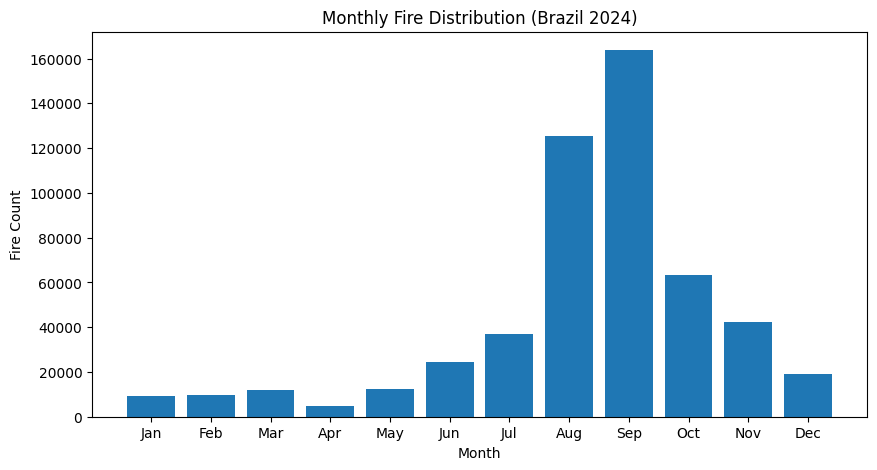

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(months, fires)
plt.title("Monthly Fire Distribution (Brazil 2024)")
plt.xlabel("Month")
plt.ylabel("Fire Count")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/modis_2024_Brazil.csv")
df.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-12.9469,-56.8037,303.7,2.7,1.6,2024-01-01,121,Terra,MODIS,57,61.03,284.7,19.9,N,0
1,-12.9416,-56.8109,303.4,2.7,1.6,2024-01-01,121,Terra,MODIS,55,61.03,284.9,20.9,N,0
2,-2.2642,-53.7862,309.2,1.1,1.1,2024-01-01,124,Terra,MODIS,75,61.03,291.1,8.3,N,0
3,-2.6667,-54.2720,302.8,1.2,1.1,2024-01-01,124,Terra,MODIS,51,61.03,289.2,4.3,N,0
4,-2.2628,-53.7761,303.2,1.1,1.1,2024-01-01,124,Terra,MODIS,49,61.03,290.8,3.6,N,0


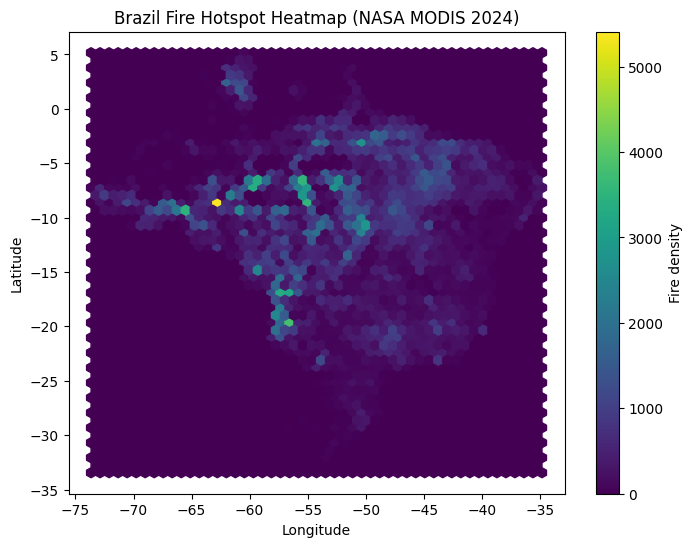

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(df['longitude'], df['latitude'], gridsize=50)
plt.colorbar(label="Fire density")
plt.title("Brazil Fire Hotspot Heatmap (NASA MODIS 2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


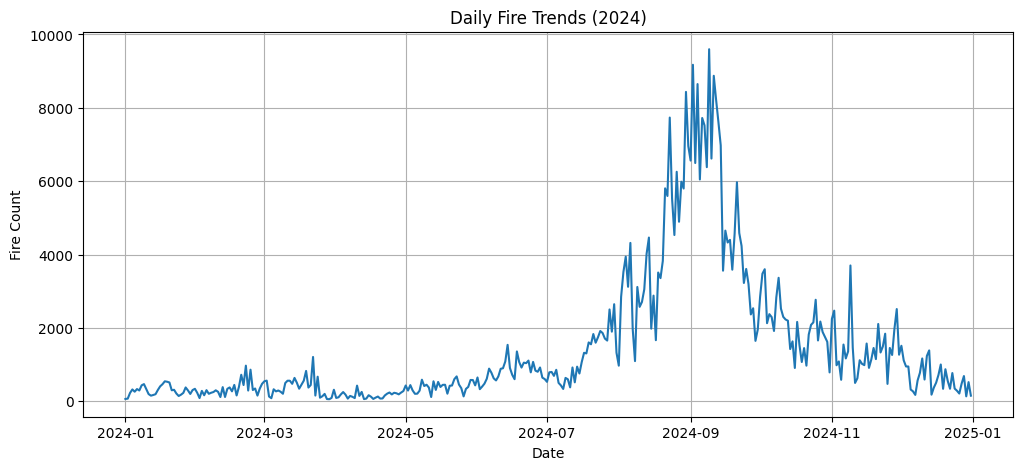

In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'])

daily_counts = df.groupby('acq_date').size()

plt.figure(figsize=(12,5))
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Daily Fire Trends (2024)")
plt.xlabel("Date")
plt.ylabel("Fire Count")
plt.grid(True)
plt.show()
